In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel(r"E:\cursor\IPO chart preparation and performance measure\Cleaned_All_IPO_Data.xlsx").to_csv('IPO_data.csv')

In [4]:
data = pd.read_csv(r"E:\cursor\IPO chart preparation and performance measure\IPO_data.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         579 non-null    int64  
 1   Company Name       579 non-null    object 
 2   Listed Date        579 non-null    object 
 3   Issue Price        579 non-null    int64  
 4   Listing Day Close  579 non-null    float64
 5   Listing Day Gain   579 non-null    float64
 6   Current Price      278 non-null    float64
 7   Profit/Loss        579 non-null    float64
 8   Year               579 non-null    int64  
 9   Is_Successful      579 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 45.4+ KB


In [6]:
data.describe()

,Unnamed: 0,Issue Price,Listing Day Close,Listing Day Gain,Current Price,Profit/Loss,Year,Is_Successful
count,579.000000,579.000000,579.000000,579.000000,278.000000,579.000000,579.000000,579.000000
mean,289.000000,85.419689,105.668325,0.002408,168.029460,0.016549,2022.530225,0.043178
std,167.287178,77.984283,108.888752,0.004381,290.474491,0.050096,1.685590,0.203433
min,0.000000,10.000000,8.550000,-0.004750,0.000000,-0.009851,2019.000000,0.000000
25%,144.500000,44.000000,48.475000,0.000000,29.417500,-0.003030,2022.000000,0.000000
50%,289.000000,70.000000,80.850000,0.000621,70.370000,0.002215,2023.000000,0.000000
75%,433.500000,105.000000,139.500000,0.003505,155.275000,0.016813,2024.000000,0.000000
max,578.000000,1229.000000,1796.800000,0.031140,1938.150000,0.453367,2025.000000,1.000000


In [7]:
data.isnull().sum()

Unnamed: 0             0
Company Name           0
Listed Date            0
Issue Price            0
Listing Day Close      0
Listing Day Gain       0
Current Price        301
Profit/Loss            0
Year                   0
Is_Successful          0
dtype: int64

In [8]:
data['Is_Successful'].value_counts()

Is_Successful
0    554
1     25
Name: count, dtype: int64

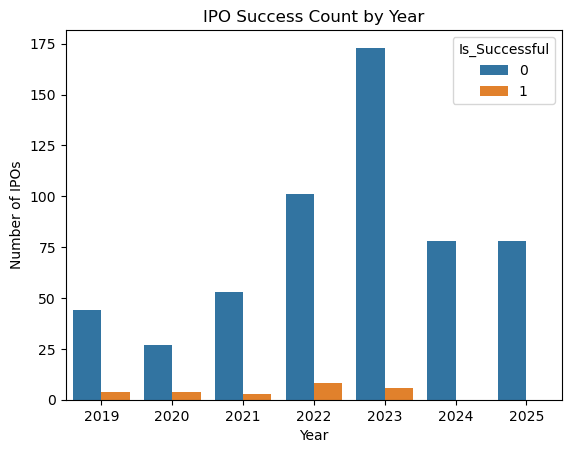

In [9]:
sns.countplot(x='Year', hue = 'Is_Successful', data = data)
plt.title('IPO Success Count by Year')
plt.ylabel('Number of IPOs')
plt.show()

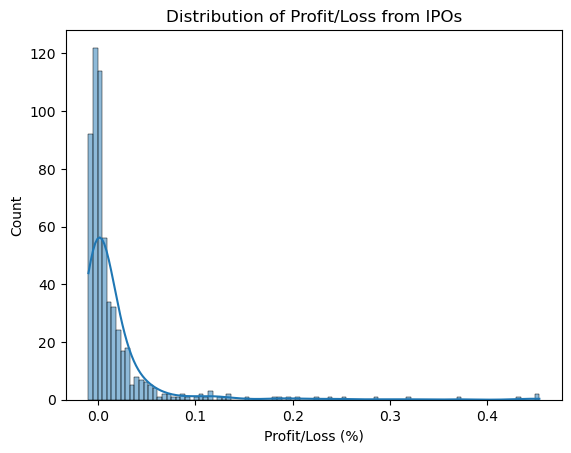

In [10]:
sns.histplot(data['Profit/Loss'], kde = True)
plt.title("Distribution of Profit/Loss from IPOs")
plt.xlabel("Profit/Loss (%)")
plt.show()

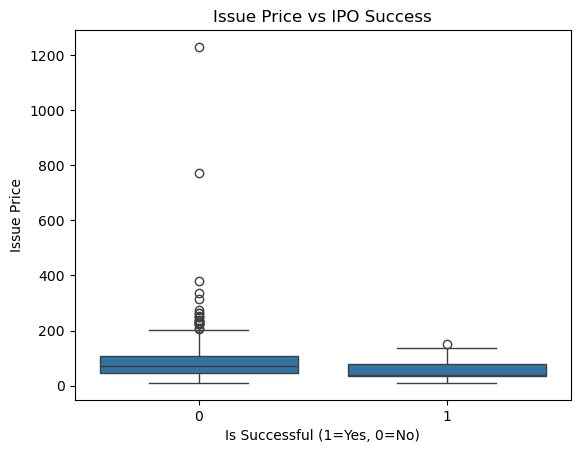

In [11]:
sns.boxplot(x = 'Is_Successful', y = 'Issue Price', data = data)
plt.title("Issue Price vs IPO Success")
plt.xlabel("Is Successful (1=Yes, 0=No)")
plt.ylabel("Issue Price")
plt.show()

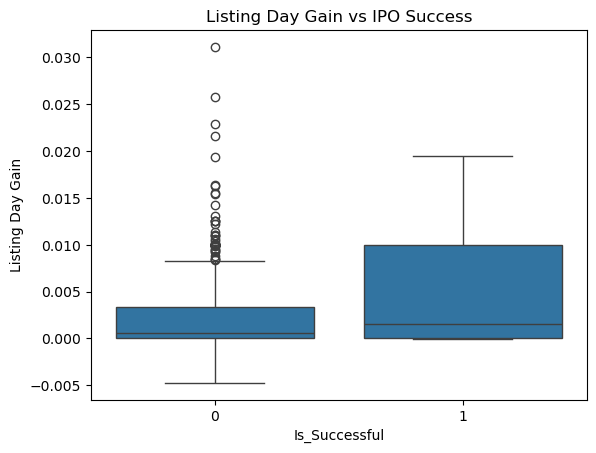

In [12]:
sns.boxplot(x = 'Is_Successful', y = 'Listing Day Gain', data = data)
plt.title("Listing Day Gain vs IPO Success")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Accuracy: 0.9464285714285714

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.25      0.40         4

    accuracy                           0.95        56
   macro avg       0.97      0.62      0.69        56
weighted avg       0.95      0.95      0.93        56

Confusion Matrix:
 [[52  0]
 [ 3  1]]


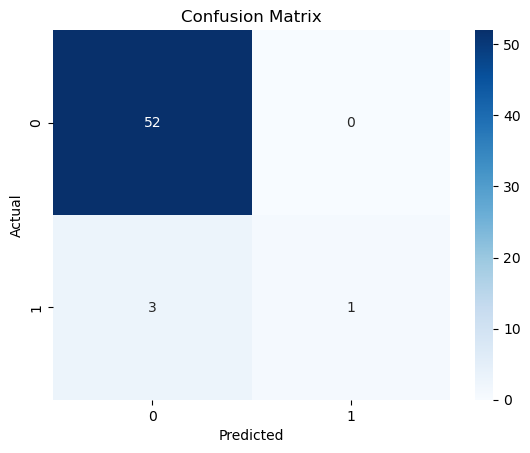

In [14]:
data = data.dropna(subset=['Is_Successful'])

features = ['Issue Price', 'Listing Day Close', 'Listing Day Gain', 'Current Price']
df = data.dropna(subset=features)  

X = df[features]
y = df['Is_Successful']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/25
12/12 [==============================] - 3s 52ms/step - loss: 0.6962 - accuracy: 0.5650 - val_loss: 0.5887 - val_accuracy: 0.9778
Epoch 2/25
12/12 [==============================] - 0s 13ms/step - loss: 0.5481 - accuracy: 0.9492 - val_loss: 0.4667 - val_accuracy: 0.9778
Epoch 3/25
12/12 [==============================] - 0s 11ms/step - loss: 0.4825 - accuracy: 0.9718 - val_loss: 0.3663 - val_accuracy: 0.9778
Epoch 4/25
12/12 [==============================] - 0s 11ms/step - loss: 0.3786 - accuracy: 0.9718 - val_loss: 0.2792 - val_accuracy: 0.9778
Epoch 5/25
12/12 [==============================] - 0s 12ms/step - loss: 0.2977 - accuracy: 0.9718 - val_loss: 0.2086 - val_accuracy: 0.9778
Epoch 6/25
12/12 [==============================] - 0s 12ms/step - loss: 0.2459 - accuracy: 0.9718 - val_loss: 0.1558 - val_accuracy: 0.9778
Epoch 7/25
12/12 [==============================] - 0s 11ms/step - loss: 0.2001 - accuracy: 0.9718 - val_loss: 0.1175 - val_accuracy: 0.9778
Epoch 8/25
12

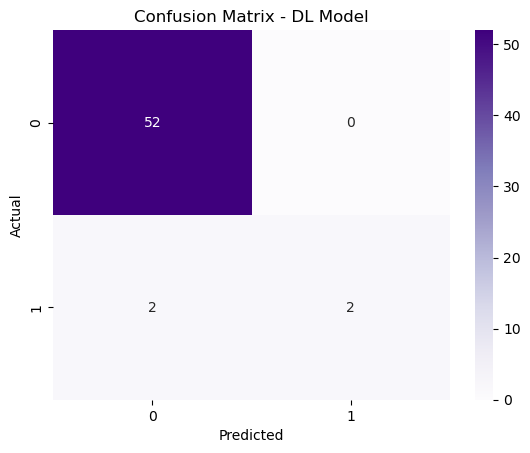

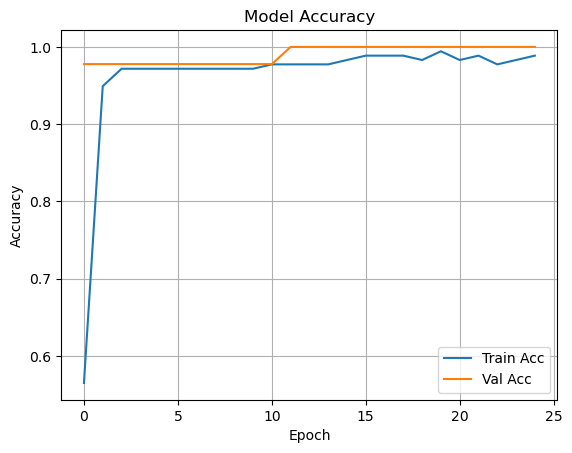

In [18]:
X = df[features].values
y = df['Is_Successful'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, 
    y_train,
    epochs=25,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("DL Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - DL Model")
plt.show()

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))


Random Forest Accuracy: 0.9464285714285714
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.25      0.40         4

    accuracy                           0.95        56
   macro avg       0.97      0.62      0.69        56
weighted avg       0.95      0.95      0.93        56



In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))


KNN Accuracy: 0.9464285714285714
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.25      0.40         4

    accuracy                           0.95        56
   macro avg       0.97      0.62      0.69        56
weighted avg       0.95      0.95      0.93        56



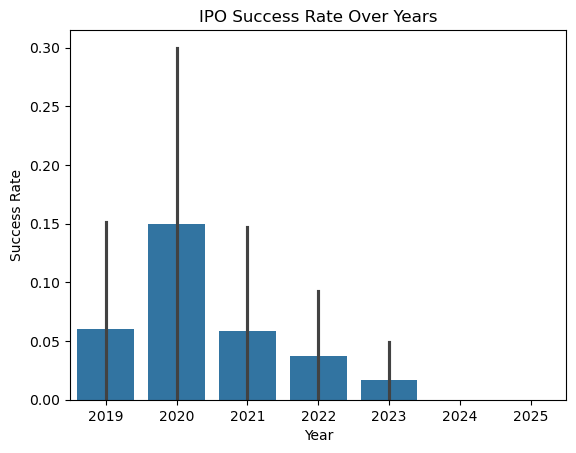

In [22]:
sns.barplot(data=df, x='Year', y='Is_Successful')
plt.title("IPO Success Rate Over Years")
plt.ylabel("Success Rate")
plt.xlabel("Year")
plt.show()


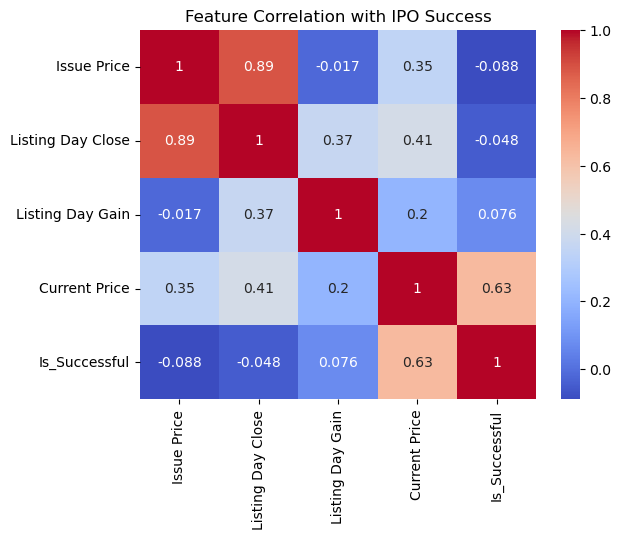

In [23]:
sns.heatmap(df[features + ['Is_Successful']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with IPO Success")
plt.show()


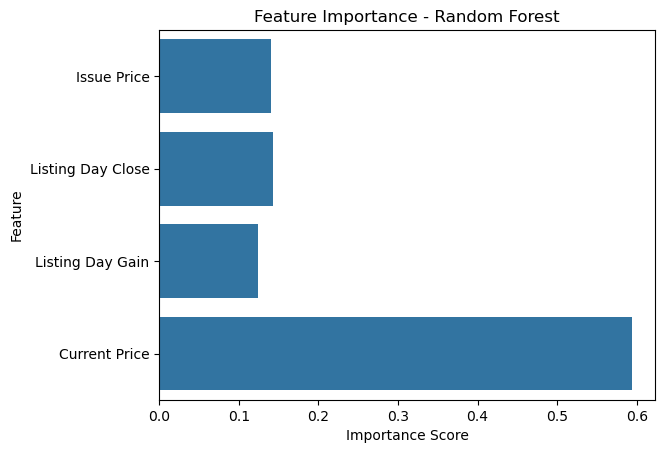

In [26]:
importances = rf.feature_importances_
feature_names = ['Issue Price', 'Listing Day Close', 'Listing Day Gain', 'Current Price']
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
